In [6]:
import datasets

In [7]:
from pathlib import Path
from glob import glob

In [8]:
participants = [Path(path).stem for path in glob('../data/ecg_features_60s/*.csv')]

In [9]:
dataset = datasets.load_dataset(
    '../data/ecg_features_60s', 
    train_participants=participants,
    trust_remote_code=True
)

In [10]:
def encode(samples):
    baseline = ['Sitting', 'Recov1', 'Recov2', 'Recov3', 'Recov4', 'Recov5', 'Recov6']
    mental_stress = ['TA', 'SSST_Sing_countdown', 'Pasat', 'Raven', 'TA_repeat', 'Pasat_repeat']
    high_physical_stress = ['Treadmill1', 'Treadmill2', 'Treadmill3', 'Treadmill4', 'Walking_fast_pace', 'Cycling', 'stairs_up_and_down']
    moderate_physical_stress = ['Walking_own_pace', 'Dishes', 'Vacuum']
    low_physical_stress = ['Standing', 'Lying_supine', 'Recov_standing']
    
    def encode_multiclass(label):
        if label in baseline:
            return 0
        elif label in mental_stress:
            return 1
        elif label in high_physical_stress:
            return 2
        elif label in moderate_physical_stress:
            return 0
        elif label in low_physical_stress:
            return 0
        else:
            return -1
        
    return {
        'label': [encode_multiclass(label) for label in samples['label']],
    }

In [11]:
dataset['fit'] = dataset['fit'].map(encode, batched=True, batch_size=2048, num_proc=4)

Map (num_proc=4): 100%|██████████| 3873284/3873284 [00:03<00:00, 1009660.46 examples/s]


In [12]:
X_labels =  [
    'μhrv',
    'σhrv',
    'TINN',
    'rmsHRV',
    'ULF',
    'LF',
    'HF',
    'UHF',
    'LF_HF_ratio',
    'Σ',
    'relative_power_ulf',
    'relative_power_lf',
    'relative_power_hf',
    'relative_power_uhf',
    'LF_norm',
    'HF_norm',
    'μhr',
    'σhr',
    'hr_max',
    'hr_min',
    'rmssd',
    'rr_mean',
    'rr_std',
]
y_label = 'label'

In [13]:
train = dataset['fit'].to_pandas()

In [14]:
train

,label,μhr,σhr,μhrv,σhrv,NN50,pNN50,TINN,rmsHRV,ULF,...,relative_power_lf,relative_power_hf,relative_power_uhf,LF_norm,HF_norm,hr_max,hr_min,rmssd,rr_mean,rr_std
0,-1,54.853059,5.848016,1.105887,0.113782,19.0,0.358491,0.452000,1.111725,22.076826,...,0.257406,5.218568,1.493255,0.052186,0.052186,68.728522,68.728522,0.077181,1.105887,0.113782
1,-1,54.853059,5.848016,1.105887,0.113782,19.0,0.358491,0.452000,1.111725,22.076826,...,0.257406,5.218568,1.493255,0.052186,0.052186,68.728522,68.728522,0.077181,1.105887,0.113782
2,-1,55.190643,6.182622,1.100321,0.118461,19.0,0.358491,0.467000,1.106679,21.868379,...,0.184218,6.855489,0.686491,0.068555,0.068555,69.930070,69.930070,0.077356,1.100321,0.118461
3,-1,55.190643,6.182622,1.100321,0.118461,19.0,0.358491,0.467000,1.106679,21.868379,...,0.184218,6.855489,0.686491,0.068555,0.068555,69.930070,69.930070,0.077356,1.100321,0.118461
4,-1,55.190643,6.182622,1.100321,0.118461,19.0,0.358491,0.467000,1.106679,21.868379,...,0.184218,6.855489,0.686491,0.068555,0.068555,69.930070,69.930070,0.077356,1.100321,0.118461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873279,0,95.806575,23.365124,0.919061,1.737663,11.0,0.224490,2.312250,1.965743,14.628522,...,3.823941,94.695329,0.000000,0.946953,0.946953,173.913043,173.913043,2.272021,0.919061,1.737663
3873280,0,95.806575,23.365124,0.919061,1.737663,11.0,0.224490,2.312250,1.965743,14.628522,...,3.823941,94.695329,0.000000,0.946953,0.946953,173.913043,173.913043,2.272021,0.919061,1.737663
3873281,0,95.605708,23.565346,0.926354,1.754928,11.0,0.229167,2.361447,1.984416,14.305243,...,5.451677,93.147171,0.000000,0.931472,0.931472,173.913043,173.913043,2.296064,0.926354,1.754928
3873282,0,95.605708,23.565346,0.926354,1.754928,11.0,0.229167,2.361447,1.984416,14.305243,...,5.451677,93.147171,0.000000,0.931472,0.931472,173.913043,173.913043,2.296064,0.926354,1.754928


In [15]:
import matplotlib.pyplot as plt

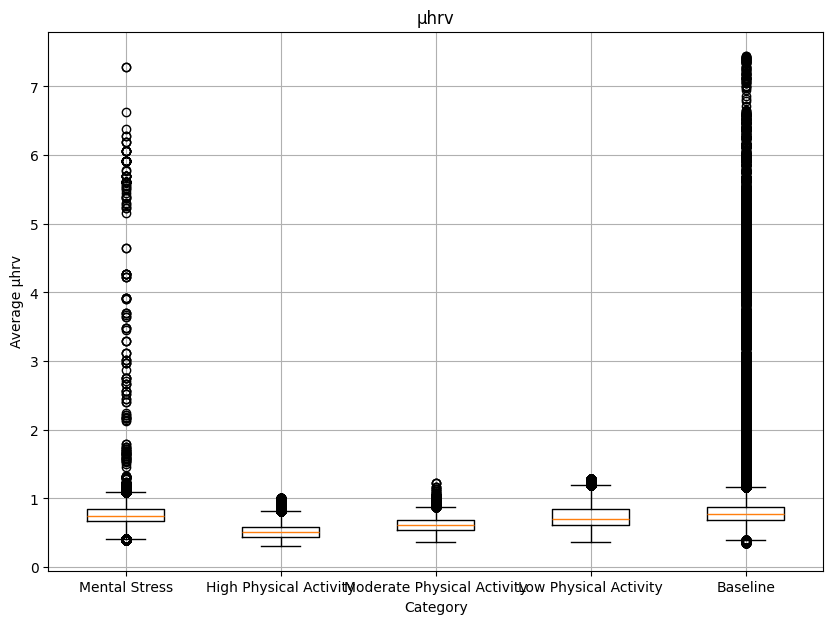

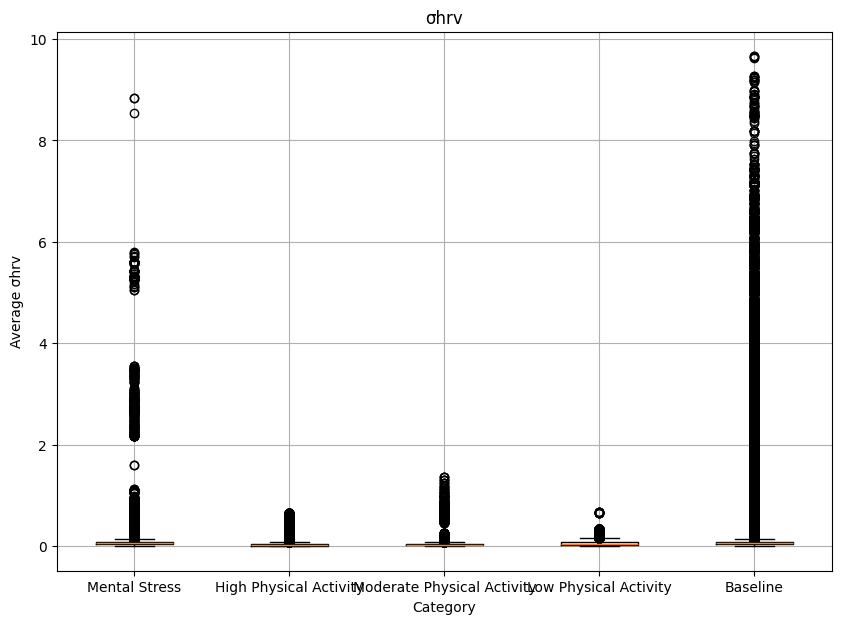

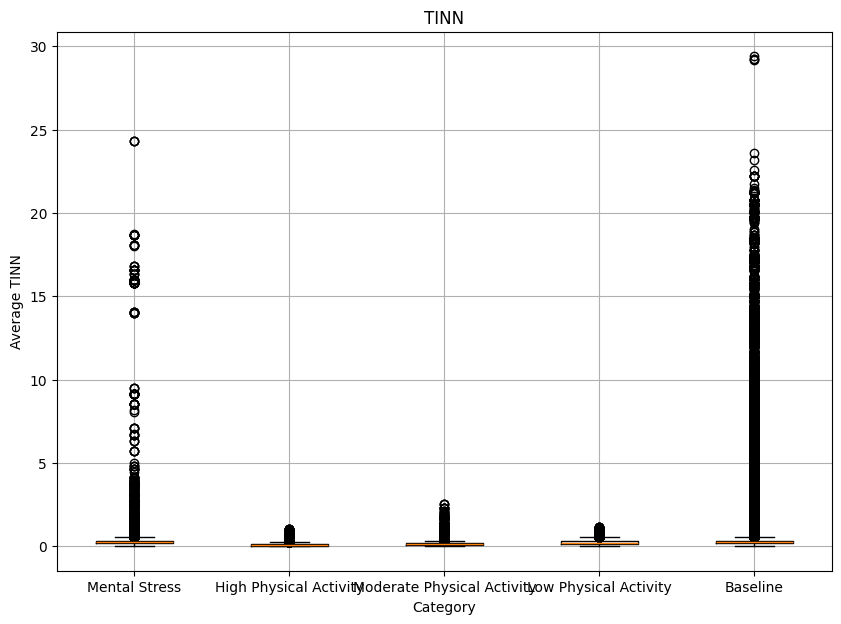

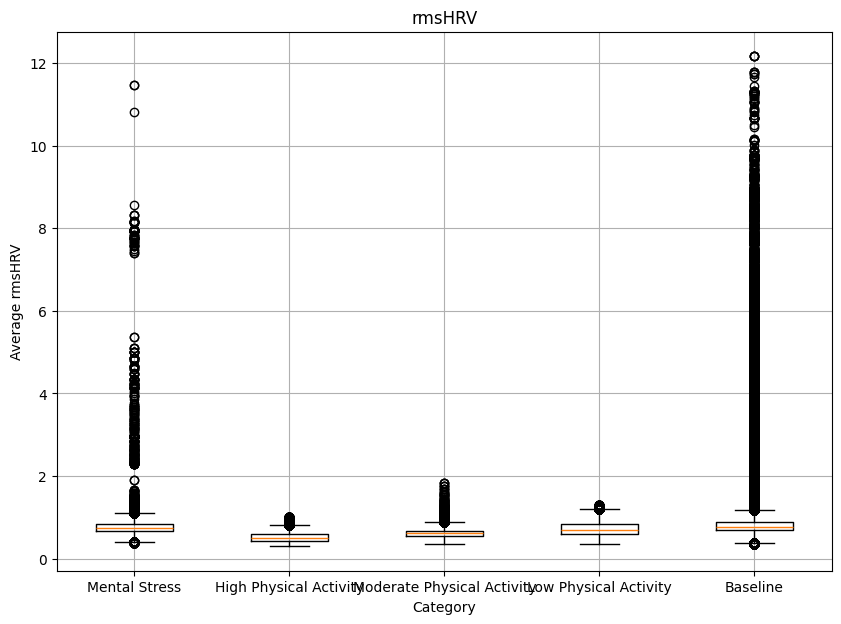

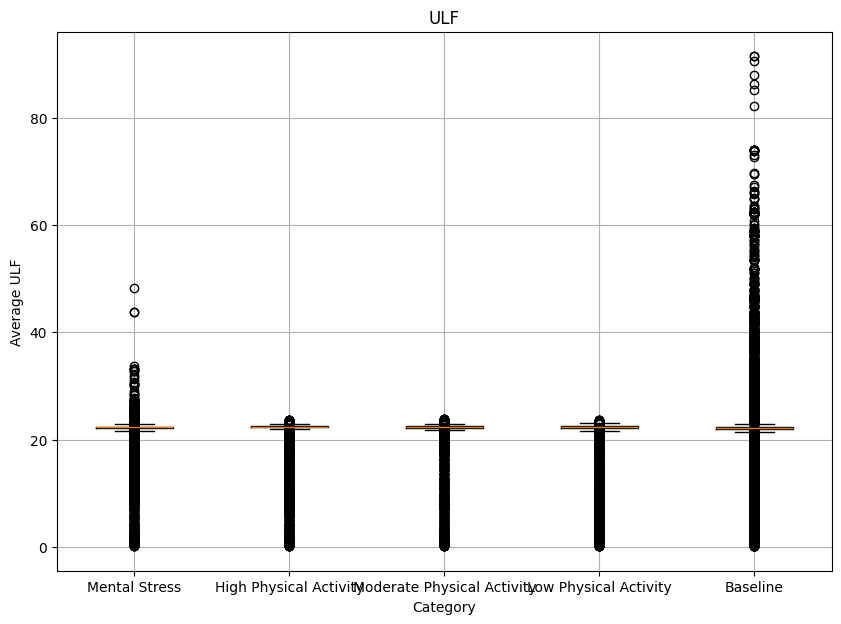

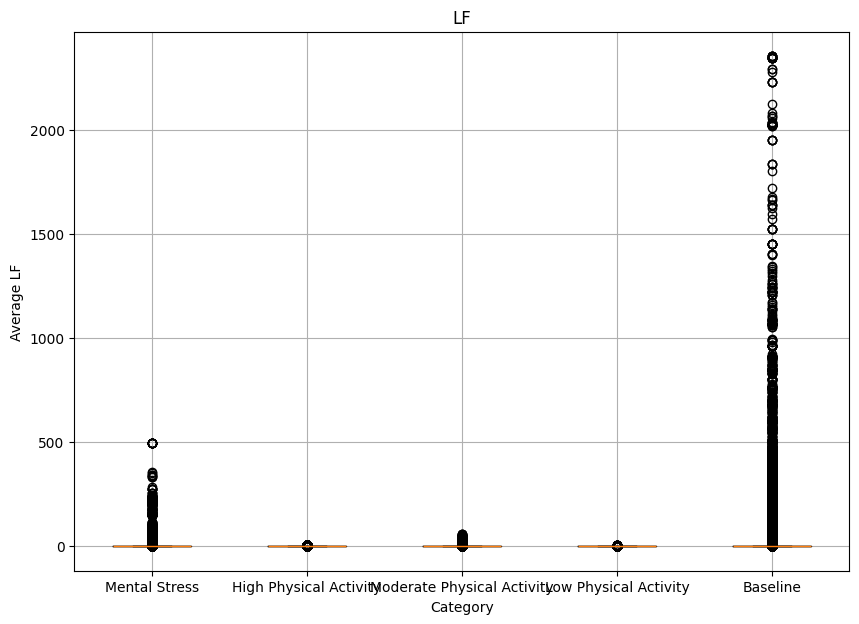

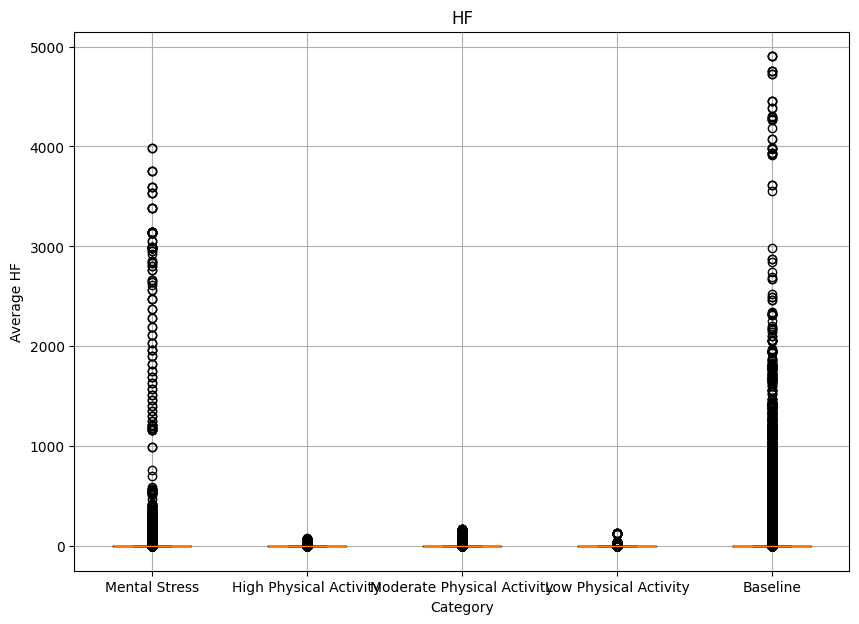

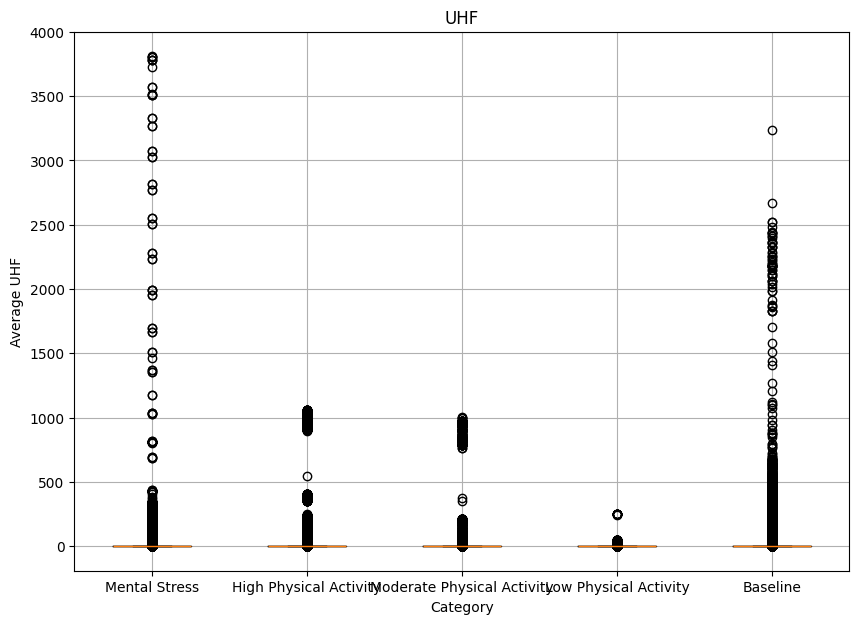

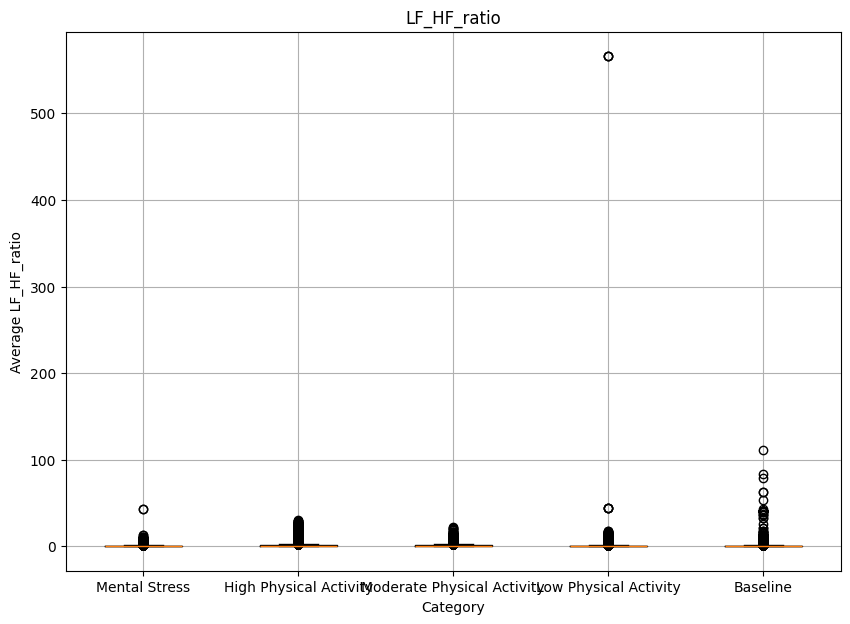

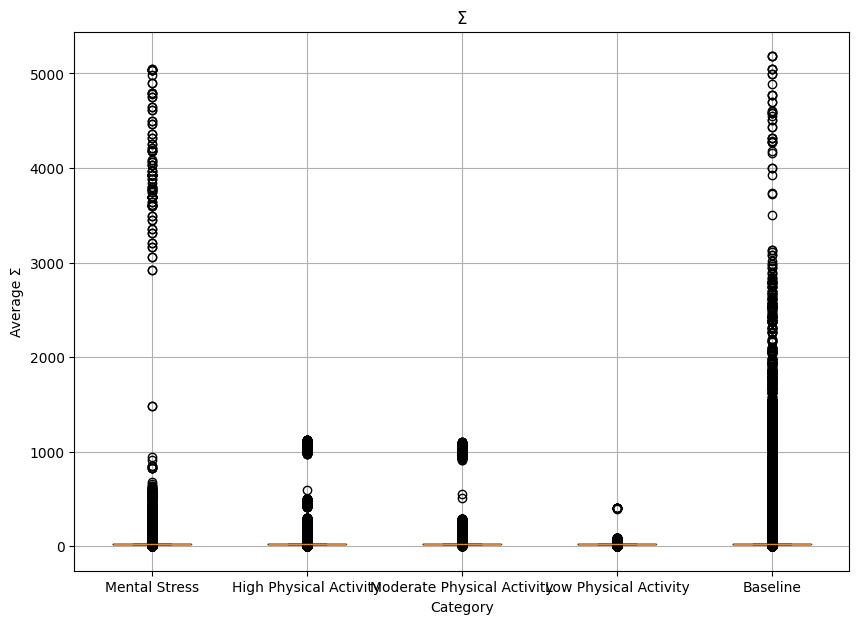

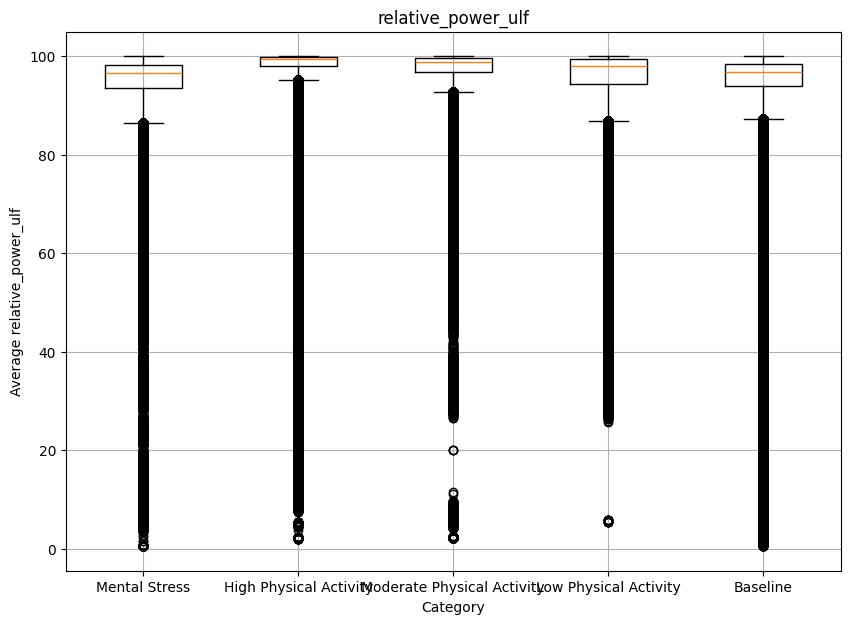

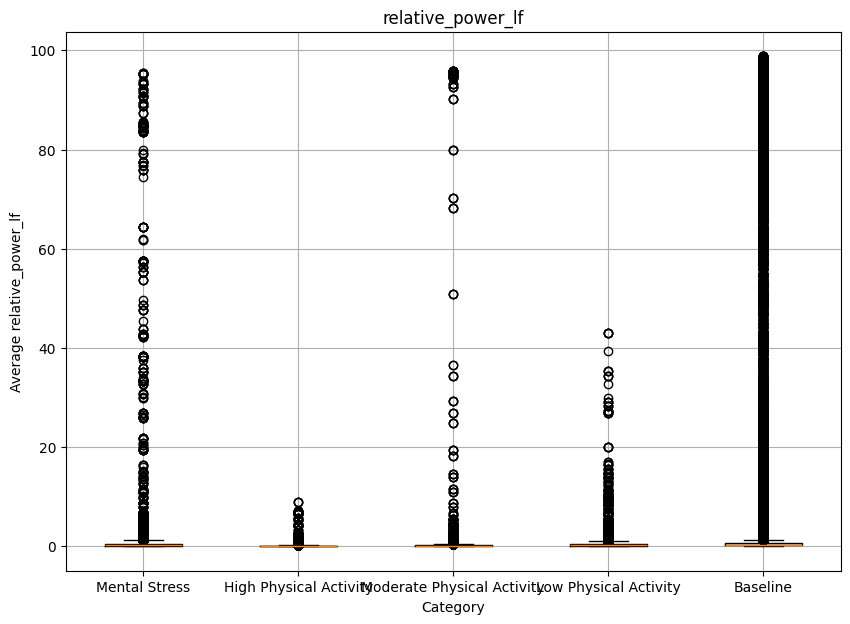

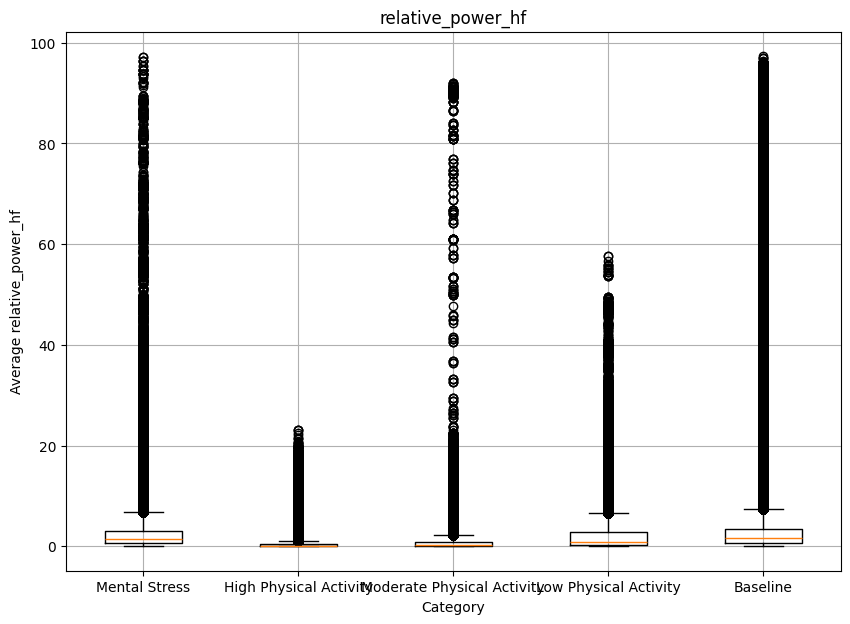

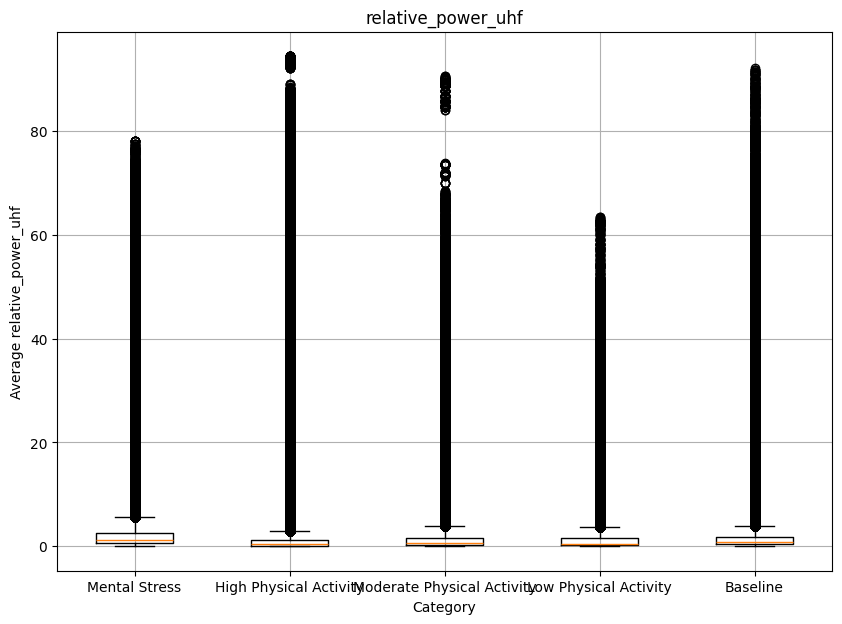

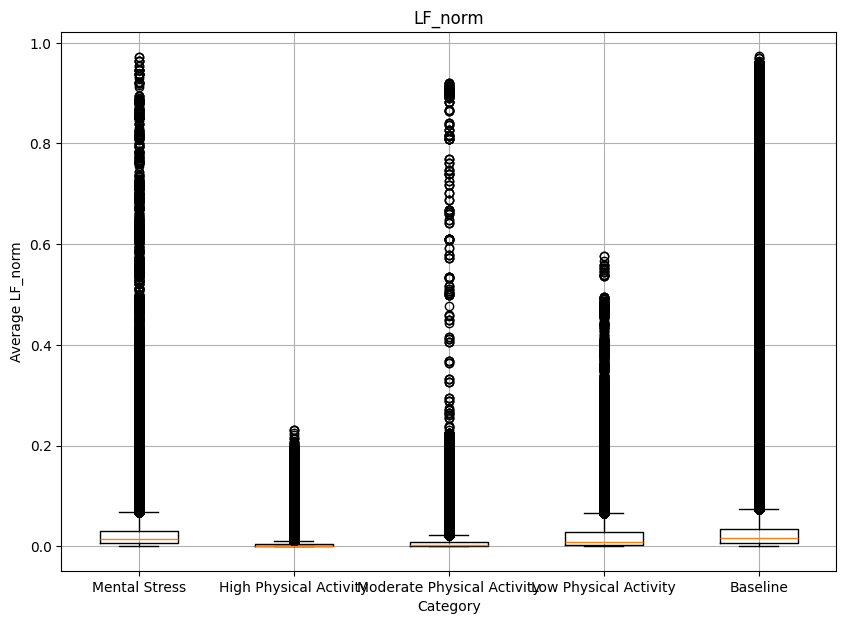

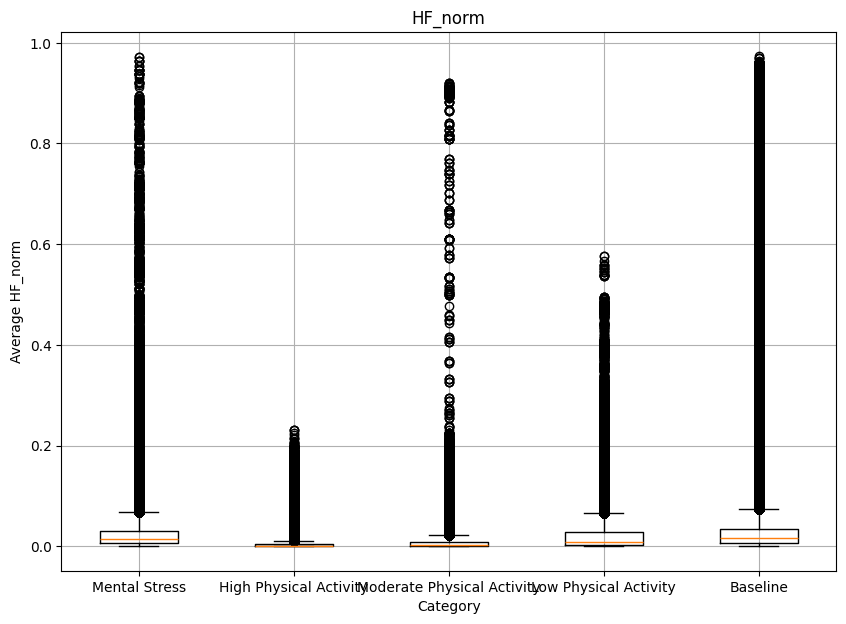

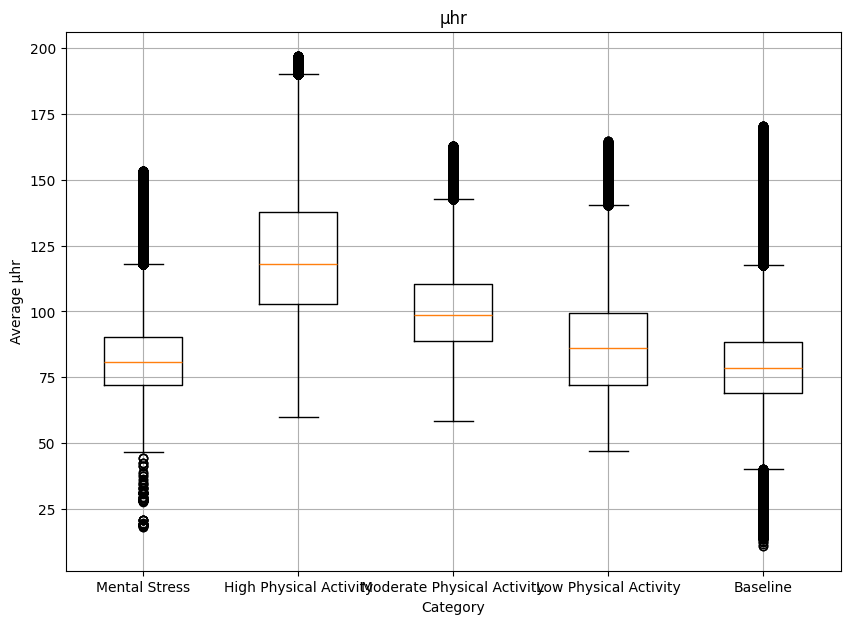

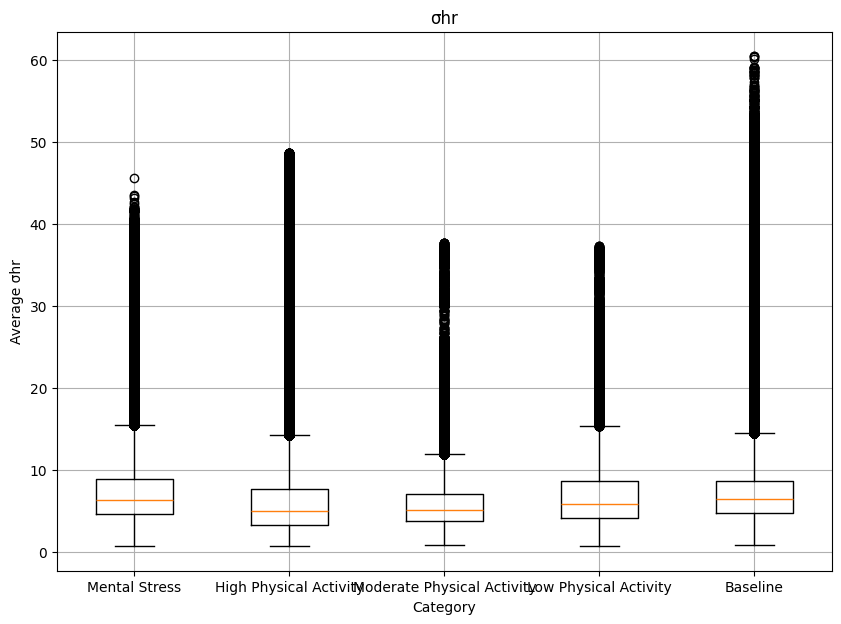

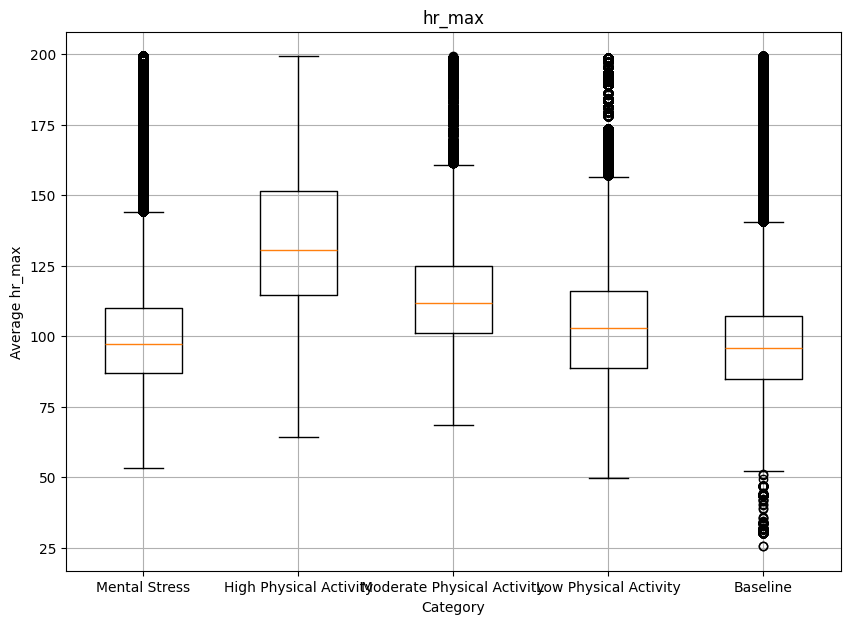

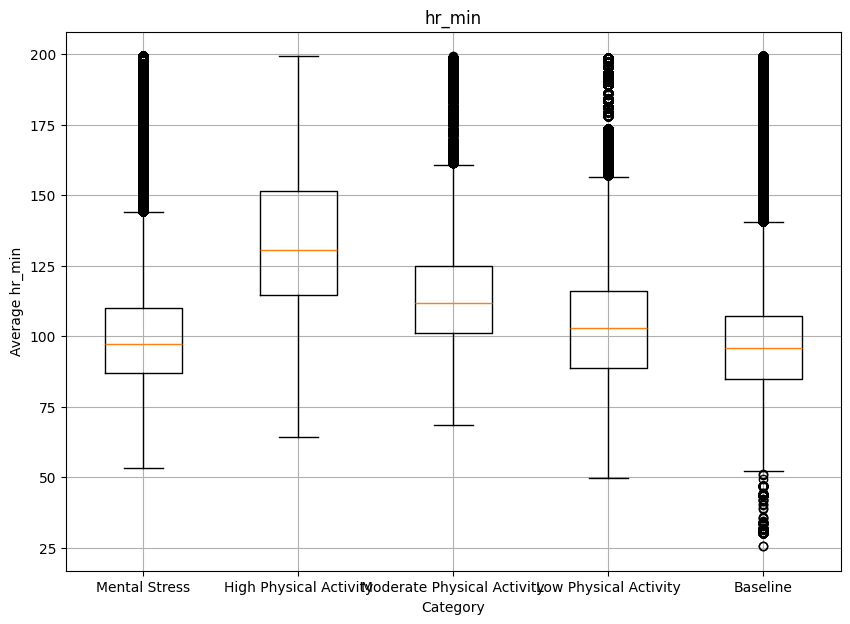

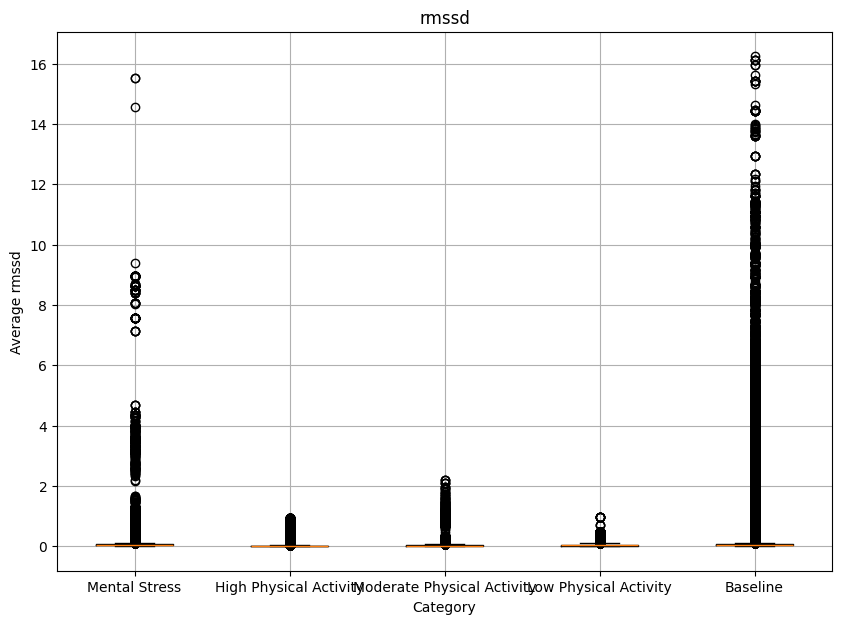

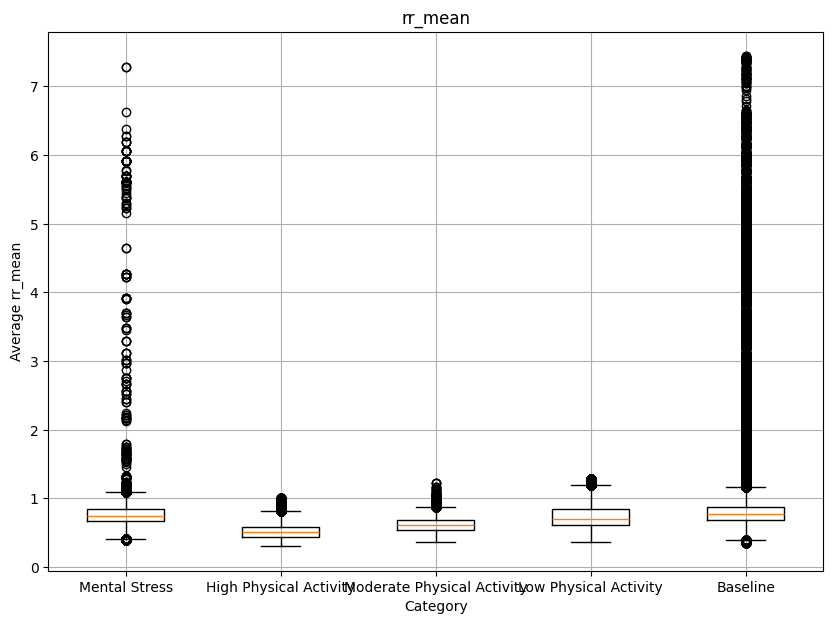

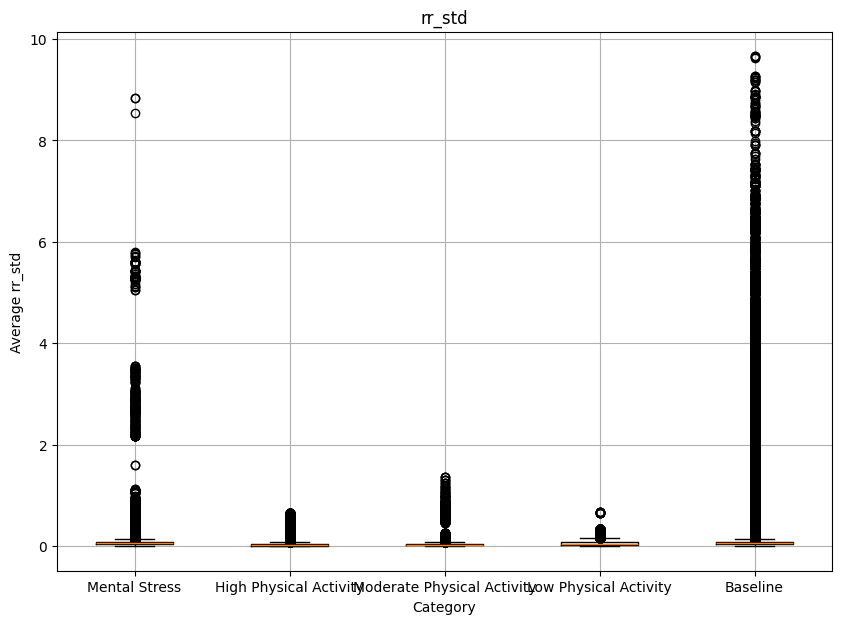

In [16]:
for feature in X_labels:
    fig, ax=plt.subplots(figsize=(10,7))
    ax.boxplot([
        train[train['label'] == 1][feature],
        train[train['label'] == 2][feature], 
        train[train['label'] == 0][feature]
    ], labels=['Mental Stress', 'High Physical Activity', 'Baseline'])
    ax.set_title(f'{feature}')
    ax.set_xlabel('Category')
    ax.set_ylabel(f'Average {feature}')
    plt.savefig(f'../public/{feature}.png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.grid()
    plt.show()